# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import json 
import ipympl
# %matplotlib
from pylab import rcParams
import math

## Converting JSON to CSV

In [2]:
with open('clusteringDB.json') as json_file: 
    data = json.load(json_file)
    
cluster_data = data['DB']
clusteringDB = open('clusteringDB.csv', 'w')
csv_writer = csv.writer(clusteringDB)
count = 0
  
for x in cluster_data: 
    if count == 0: 
  
        header = x.keys() 
        csv_writer.writerow(header) 
        count += 1
   
    csv_writer.writerow(x.values()) 
  
clusteringDB.close() 

## Reading Data

In [3]:
df=pd.read_csv('clusteringDB.csv')
df.head()
# df.dropna(axis=0,how='any',subset=['lat','long'],inplace=True)

,lat,long,disease,diseased
0,12.34567,98.76543,Blackleg,True
1,12.34765,93.76543,Blackleg,True
2,14.34567,98.86543,Enterotoxaemia (pulpy kidney),True
3,12.34444,98.01010,Classical swine fever,True
4,10.34567,100.76543,Azurskey's,True


In [4]:
X=df.loc[:,['disease','lat','long']]
X

,disease,lat,long
0,Blackleg,12.34567,98.76543
1,Blackleg,12.34765,93.76543
2,Enterotoxaemia (pulpy kidney),14.34567,98.86543
3,Classical swine fever,12.34444,98.01010
4,Azurskey's,10.34567,100.76543
5,Blackleg,21.34567,80.76543
6,Azurskey's,18.34507,90.70543
7,Classical swine fever,12.00000,98.42424
8,Enterotoxaemia (pulpy kidney),25.87875,92.79543
9,Blackleg,17.34567,91.76543


In [5]:
count = X['disease'].nunique()
# df['hID'].nunique()
count

4

## Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
dfle = X
dfle.disease = le.fit_transform(dfle.disease)
dfle

,disease,lat,long
0,1,12.34567,98.76543
1,1,12.34765,93.76543
2,3,14.34567,98.86543
3,2,12.34444,98.01010
4,0,10.34567,100.76543
5,1,21.34567,80.76543
6,0,18.34507,90.70543
7,2,12.00000,98.42424
8,3,25.87875,92.79543
9,1,17.34567,91.76543


In [8]:
count = dfle['disease'].nunique()

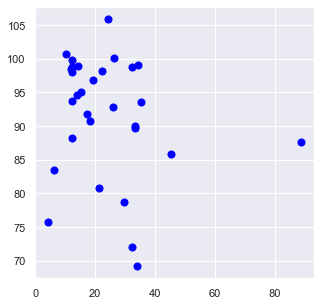

In [9]:
# ax = dfle.plot.scatter(x='lat', y='long', color='DarkGreen',s = 0);
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(dfle['lat'],dfle['long'],color='blue',s=50)

In [10]:
my_df = dfle.copy()
my_df = my_df.iloc[0:0]
my_df

,disease,lat,long


In [11]:
centers = [0,0]
centers

[0, 0]

## K-Means Clustering

In [12]:
for x in range(count):
    xdf = dfle.loc[dfle['disease'] == x]
    dist_points_from_cluster_center = []
    q = xdf.shape[0]
    temp = xdf.loc[:,['lat','long']]
    K = range(1,q)
    for no_of_clusters in K:
        k_model = KMeans(n_clusters = no_of_clusters)
        k_model.fit(temp)
        dist_points_from_cluster_center.append(k_model.inertia_)

    #Function to find distance between a point and a line
    def calc_distance(x1,y1,a,b,c):
        d = abs((a*x1 + b*y1 +c))/(math.sqrt(a*a + b*b))
        return d

    a = dist_points_from_cluster_center[0] - dist_points_from_cluster_center[q-2]
    b = K[q-2] - K[0]
    c1 = K[0]*dist_points_from_cluster_center[q-2]
    c2 = K[q-2]*dist_points_from_cluster_center[0]
    c = c1-c2

    distance_of_points_from_line = []
    for k in range(q-1):
        distance_of_points_from_line.append(
        calc_distance(K[k], dist_points_from_cluster_center[k],a,b,c))

    optimum_k = distance_of_points_from_line.index(max(distance_of_points_from_line)) + 1
    kmeans = KMeans(n_clusters = optimum_k, init ='k-means++',random_state=50)

    kmeans.fit(temp)
    y = kmeans.fit_predict(temp)
    
    xdf = xdf.copy()
    xdf['cluster_label'] = (y + (x*10))/10
    
    center = kmeans.cluster_centers_
#     xdf['center'] = center
#     print(centers)
#     print(center)
    centers = np.vstack((centers,center))
    xdf
    my_df = my_df.append(xdf,ignore_index=True,sort = False)

Labelled Dataframe

In [13]:
my_df

,disease,lat,long,cluster_label
0,0,10.34567,100.76543,0.0
1,0,18.34507,90.70543,0.0
2,0,22.12345,98.12345,0.1
3,0,24.34521,105.90801,0.1
4,0,4.12222,75.75757,0.2
5,0,13.98897,94.65656,0.0
6,0,26.34444,100.10111,0.1
7,0,35.34452,93.54321,0.1
8,1,12.34567,98.76543,1.0
9,1,12.34765,93.76543,1.0


# Centers

In [14]:
# centers.remove([0,0])
centers = np.delete(centers, 0,0) 
centers

array([[14.22657   , 95.37580667],
       [27.039405  , 99.418945  ],
       [ 4.12222   , 75.75757   ],
       [15.346165  , 95.26843   ],
       [29.26748333, 73.99588667],
       [33.62996   , 92.88646667],
       [35.74524667, 87.76662   ],
       [12.17222   , 98.21717   ],
       [14.40496   , 93.024975  ],
       [88.88887   , 87.65472   ]])

In [15]:
labels = my_df['cluster_label']
len(labels)

30

In [16]:
from collections import Counter, defaultdict
print(Counter(labels))

Counter({3.0: 6, 0.1: 4, 1.0: 4, 0.0: 3, 1.1: 3, 1.2: 3, 2.0: 3, 2.1: 2, 0.2: 1, 3.1: 1})


# Visualising Points

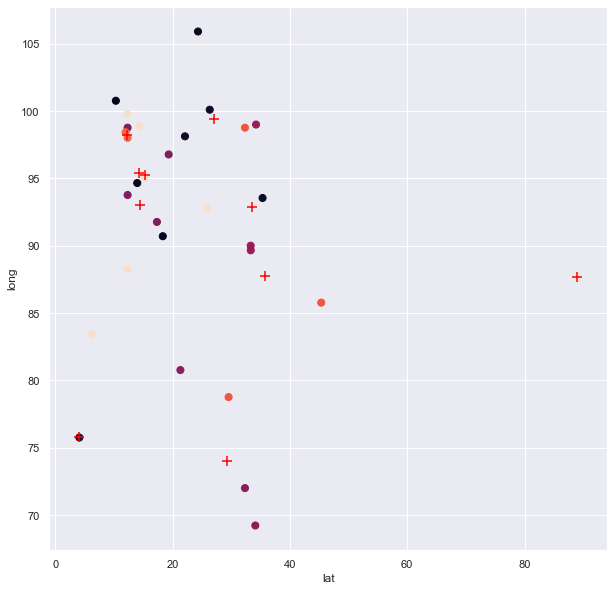

In [17]:
# plt.style.use(['dark_background'])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(my_df['lat'],my_df['long'],c=labels,s=50)
for i,j in centers:
    ax.scatter(i,j,s=100,c='red',marker='+')
ax.set_xlabel('lat')
ax.set_ylabel('long')
# plt.colorbar(scatter)

plt.show()

In [18]:
import json

data = centers
list = [{"latitude": x[0], "longitude": x[1]} for x in data]

output = json.dumps(list)

In [19]:
output

'[{"latitude": 14.22657, "longitude": 95.37580666666668}, {"latitude": 27.039405000000002, "longitude": 99.41894500000001}, {"latitude": 4.122219999999999, "longitude": 75.75757}, {"latitude": 15.346165000000003, "longitude": 95.26843000000001}, {"latitude": 29.26748333333333, "longitude": 73.99588666666666}, {"latitude": 33.62996, "longitude": 92.88646666666666}, {"latitude": 35.74524666666667, "longitude": 87.76662}, {"latitude": 12.17222, "longitude": 98.21717}, {"latitude": 14.40496, "longitude": 93.024975}, {"latitude": 88.88887, "longitude": 87.65472}]'

In [20]:
with open('result.json', 'w') as outfile:
    json.dump(output, outfile,indent = 4)